In [1]:
import os

In [2]:
data_dir='C:\Apoorv\Hackathon\Hackthon_7_CNN_1'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from matplotlib.pyplot import imread

In [6]:
test_path=data_dir+'\\test\\test\\'
train_path=data_dir+'\\train\\train\\'

In [7]:
train_path,test_path

('C:\\Apoorv\\Hackathon\\Hackthon_7_CNN_1\\train\\train\\',
 'C:\\Apoorv\\Hackathon\\Hackthon_7_CNN_1\\test\\test\\')

In [8]:
os.listdir(train_path)

['electric bus', 'electric car']

In [9]:
os.listdir(train_path+'electric bus')[0]

'821c1f91.jpg'

In [10]:
os.listdir(train_path+'electric car')[0]

'electric-car-26.jpeg'

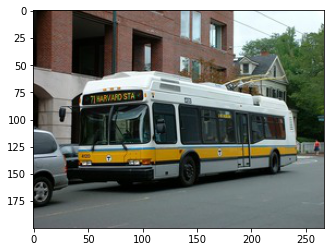

In [11]:
plt.imshow(imread(train_path+'electric bus\\'+'821c1f91.jpg'))

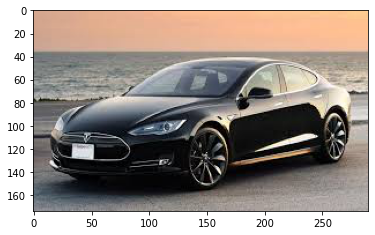

In [12]:
plt.imshow(imread(train_path+'electric car\\'+'electric-car-26.jpeg'))

In [13]:
imread(train_path+'electric car\\'+'electric-car-26.jpeg')

array([[[214, 168, 144],
        [214, 168, 144],
        [214, 168, 144],
        ...,
        [255, 206, 147],
        [255, 209, 150],
        [255, 209, 150]],

       [[214, 168, 144],
        [214, 168, 144],
        [214, 168, 144],
        ...,
        [254, 205, 146],
        [255, 207, 148],
        [255, 207, 148]],

       [[213, 167, 143],
        [213, 167, 143],
        [213, 167, 143],
        ...,
        [254, 205, 146],
        [252, 203, 144],
        [252, 203, 144]],

       ...,

       [[133, 133, 141],
        [139, 139, 147],
        [132, 132, 140],
        ...,
        [168, 163, 160],
        [173, 168, 165],
        [173, 168, 165]],

       [[126, 126, 134],
        [134, 134, 142],
        [130, 130, 138],
        ...,
        [176, 171, 168],
        [162, 157, 154],
        [162, 157, 154]],

       [[132, 133, 138],
        [140, 141, 146],
        [136, 137, 142],
        ...,
        [191, 186, 183],
        [175, 170, 167],
        [175, 170, 167]]

In [16]:
len(os.listdir(train_path+'electric car'))

743

In [17]:
len(os.listdir(train_path+'electric bus'))

743

In [18]:
len(os.listdir(test_path+'electric car'))

191

In [19]:
len(os.listdir(test_path+'electric bus'))

191

In [20]:
dim1=[]
dim2=[]

for i in os.listdir(train_path+'electric bus'):
    img=imread(train_path+'electric bus\\'+i)
    d1,d2,color=img.shape
    dim1.append(d1)
    dim2.append(d2)
    

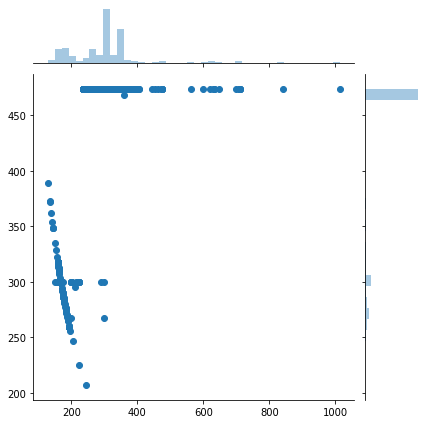

In [21]:
import seaborn as sns
sns.jointplot(dim1,dim2)

In [22]:
np.mean(dim1)

295.9179004037685

In [23]:
np.mean(dim2)

431.28936742934053

In [24]:
stand_shape=(300,450,3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
img_gen=ImageDataGenerator(rotation_range=50,width_shift_range=0.1,
                           height_shift_range=0.1,shear_range=0.1,
                           zoom_range=0.1,horizontal_flip=True,
                           fill_mode='nearest')

In [32]:
bus=train_path+'electric bus\\'+'images-317.jpg'

In [33]:
plt.imshow(img_gen.random_transform(imread(bus)))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Apoorv\\Hackathon\\Hackthon_7_CNN_1\\train\\train\\electric bus\\images-317.jpg'

In [34]:
img_gen.flow_from_directory(train_path)

Found 1486 images belonging to 2 classes.


In [35]:
img_gen.flow_from_directory(test_path)

Found 382 images belonging to 2 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [56]:
pip install -U keras-tuner

  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=e44a0a208ee614c26f60bc57d64e5c9715b7cfa1ad3eac6496f3da2d8da2c4d2
  Stored in directory: c:\users\apoorv.avasthi\appdata\local\pip\cache\wheels\78\e2\80\7fe373cad54ad22b06d0d6204cbc29cead9e69bb2680327775
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=6db32e6e32e5e4f7bdc41f15396ca62a87cc53a86b1d4c25da758802de2d9d62
  Stored in directory: c:\users\apoorv.avasthi\appdata\local\pip\cache\wheels\ba\ad\c8\2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables
Note: you may need to restart the kernel to use updated packages.


In [81]:
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

INPUT_SHAPE = (300,450,3)
NUM_CLASSES = 2

model = keras.Sequential()
model.add(
    Conv2D(
        filters=16,
        kernel_size=3,
        activation='relu',
        input_shape=INPUT_SHAPE
    )
)
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [71]:

filters=hp.Choice(
    'num_filters',
    values=[32, 64],
    default=64,
),
Dense(
    units=hp.Int(
        'units',
        min_value=32,
        max_value=512,
        step=32,
        default=128
    ),
    activation=hp.Choice(
        'dense_activation',
        values=['relu', 'tanh', 'sigmoid'],
        default='relu'
    )
)
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


hp.Float(
    'learning_rate',
    min_value=1e-5,
    max_value=1e-2,
    sampling='LOG',
    default=1e-3
)

NameError: name 'hp' is not defined

In [80]:
from kerastuner import HyperModel


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(
            Conv2D(
                filters=16,
                kernel_size=3,
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(
            Conv2D(
                filters=16,
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=32,
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters',
                    values=[32, 64],
                    default=64,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=128
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_3',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=, num_classes=NUM_CLASSES)

In [76]:
from kerastuner.tuners import RandomSearch

NUM_CLASSES = 10  # cifar10 number of classes
INPUT_SHAPE = (32, 32, 3)  # cifar10 images input shape

hypermodel = CNNHyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=1,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='Car_bus_CNN'
)

In [73]:
HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

In [77]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [64]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [65]:
tuner.search(train_img_gen,
             epochs=5,
             validation_data=test_img_gen)

AttributeError: 'DirectoryIterator' object has no attribute 'read'

In [ ]:
models = tuner.get_best_models(num_models=2)

In [37]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=stand_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=stand_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=stand_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=stand_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#OUTPUT LAYER SOFTMAX --->> MULTI CLASS
model.add(Dense(1,activation= 'sigmoid'))


#keras.io/metrics

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 448, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 111, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 109, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 52, 64)        3

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop= EarlyStopping(monitor= "val_loss",patience=2)

In [41]:
batch_size=16

In [42]:
train_img_gen = img_gen.flow_from_directory(train_path,
                                              target_size=stand_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 1486 images belonging to 2 classes.


In [43]:
test_img_gen = img_gen.flow_from_directory(test_path,
                                              target_size=stand_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',shuffle=False)

Found 382 images belonging to 2 classes.


In [44]:
train_img_gen.class_indices

{'electric bus': 0, 'electric car': 1}

In [46]:
result=model.fit_generator(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[early_stop])

Epoch 1/20
93/93 [==============================] - 243s 3s/step - loss: 0.7520 - accuracy: 0.6104 - val_loss: 0.7622 - val_accuracy: 0.6073
Epoch 2/20
93/93 [==============================] - 239s 3s/step - loss: 0.7446 - accuracy: 0.5754 - val_loss: 1.0246 - val_accuracy: 0.6440
Epoch 3/20
93/93 [==============================] - 240s 3s/step - loss: 0.7134 - accuracy: 0.5659 - val_loss: 0.9839 - val_accuracy: 0.5471


In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate_generator(test_img_gen)

C:\Users\apoorv.avasthi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.0538173913955688, 0.5497382283210754]

In [49]:
pred=model.predict_generator(test_img_gen)

C:\Users\apoorv.avasthi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [50]:
#as the predicted values were in continous values 
predictions = pred >0.5

In [51]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
test_img_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67       191
           1       0.72      0.11      0.19       191

    accuracy                           0.53       382
   macro avg       0.62      0.53      0.43       382
weighted avg       0.62      0.53      0.43       382



In [55]:
confusion_matrix(test_img_gen.classes,predictions)

array([[183,   8],
       [170,  21]], dtype=int64)

In [261]:
from tensorflow.keras.preprocessing import image

In [347]:
bus=test_path+'electric car\\'+'image-779.jpeg'

In [348]:
my_img= image.load_img(bus,target_size=stand_shape)

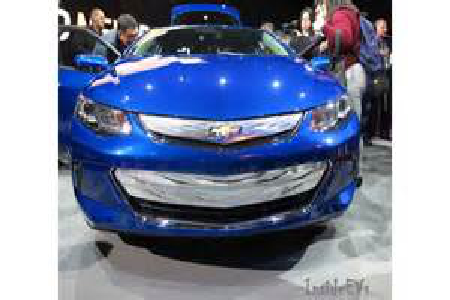

In [349]:
my_img

In [350]:
my_img_arr= image.img_to_array(my_img) 
my_img_arr=my_img_arr.reshape(1,300,450,3)
my_img_arr.shape

(1, 300, 450, 3)

In [351]:
Final_pred=model.predict(my_img_arr)
if Final_pred >0.5:
    print ('Caaaaar')
else:
    print('Bus')

Bus
